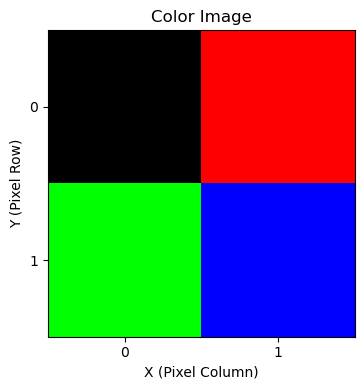

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a new image with RGB color mode and size 2x2 pixels
image = Image.new('RGB', (2, 2))

# Set individual pixel colors
pixel_colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]  # k, r, g, b

# Assign the colors to the pixels
image.putpixel((0, 0), pixel_colors[0])  # Black
image.putpixel((1, 0), pixel_colors[1])  # Red
image.putpixel((0, 1), pixel_colors[2])  # Green
image.putpixel((1, 1), pixel_colors[3])  # Blue

# Convert the image to a NumPy array
image_np = np.array(image)

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plot the color image
ax.imshow(image_np)
ax.set_title('Color Image')
ax.set_xticks(range(image_np.shape[1]))
ax.set_yticks(range(image_np.shape[0]))
ax.set_xticklabels(range(image_np.shape[1]))
ax.set_yticklabels(range(image_np.shape[0]))
ax.set_xlabel('X (Pixel Column)')
ax.set_ylabel('Y (Pixel Row)')

plt.tight_layout()
plt.show()


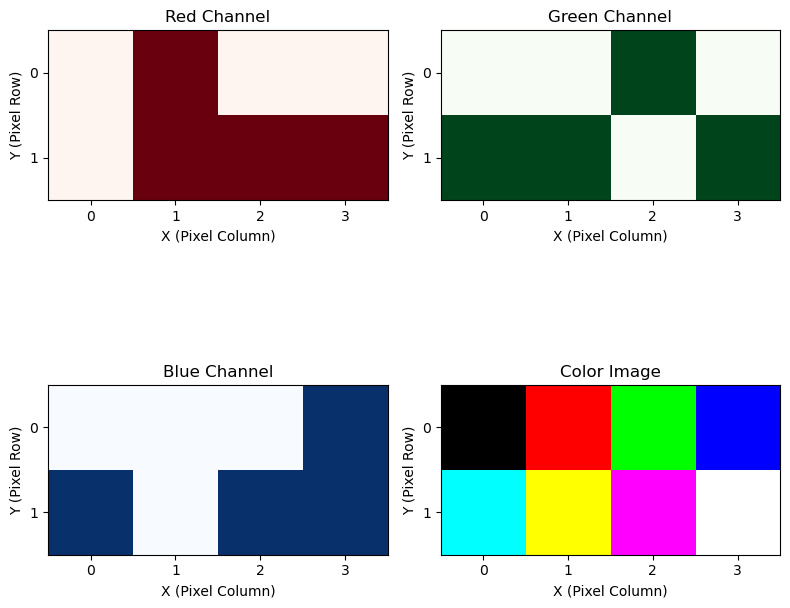

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a new image with RGB color mode and size 2x4 pixels
image = Image.new('RGB', (4, 2))

# Set individual pixel colors in the new order k, r, g, b, c, y, m, w
pixel_colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255),
                (0, 255, 255), (255, 255, 0), (255, 0, 255),
                (255, 255, 255)]  # k, r, g, b, c, y, m, w

for i in range(2):
    for j in range(4):
        image.putpixel((j, i), pixel_colors[i*4 + j])

# Convert the image to a NumPy array
image_np = np.array(image)

# Split the image into color channels
red_channel = image_np[:,:,0]
green_channel = image_np[:,:,1]
blue_channel = image_np[:,:,2]

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot each color channel
axs[0, 0].imshow(red_channel, cmap='Reds')
axs[0, 0].set_title('Red Channel')
axs[0, 0].set_xticks(range(red_channel.shape[1]))
axs[0, 0].set_yticks(range(red_channel.shape[0]))
axs[0, 0].set_xticklabels(range(red_channel.shape[1]))
axs[0, 0].set_yticklabels(range(red_channel.shape[0]))
axs[0, 0].set_xlabel('X (Pixel Column)')
axs[0, 0].set_ylabel('Y (Pixel Row)')

axs[0, 1].imshow(green_channel, cmap='Greens')
axs[0, 1].set_title('Green Channel')
axs[0, 1].set_xticks(range(green_channel.shape[1]))
axs[0, 1].set_yticks(range(green_channel.shape[0]))
axs[0, 1].set_xticklabels(range(green_channel.shape[1]))
axs[0, 1].set_yticklabels(range(green_channel.shape[0]))
axs[0, 1].set_xlabel('X (Pixel Column)')
axs[0, 1].set_ylabel('Y (Pixel Row)')

axs[1, 0].imshow(blue_channel, cmap='Blues')
axs[1, 0].set_title('Blue Channel')
axs[1, 0].set_xticks(range(blue_channel.shape[1]))
axs[1, 0].set_yticks(range(blue_channel.shape[0]))
axs[1, 0].set_xticklabels(range(blue_channel.shape[1]))
axs[1, 0].set_yticklabels(range(blue_channel.shape[0]))
axs[1, 0].set_xlabel('X (Pixel Column)')
axs[1, 0].set_ylabel('Y (Pixel Row)')

# Plot the color image
axs[1, 1].imshow(image_np)
axs[1, 1].set_title('Color Image')
axs[1, 1].set_xticks(range(image_np.shape[1]))
axs[1, 1].set_yticks(range(image_np.shape[0]))
axs[1, 1].set_xticklabels(range(image_np.shape[1]))
axs[1, 1].set_yticklabels(range(image_np.shape[0]))
axs[1, 1].set_xlabel('X (Pixel Column)')
axs[1, 1].set_ylabel('Y (Pixel Row)')

plt.tight_layout()
plt.show()